In [1]:
import pandas as pd

# Read the CSV files
filtered_col_mat_nuw_data = pd.read_csv("Filtered_col_mat_nuw_output.csv")
kan_data = pd.read_csv("kan_output.csv")
filtered_mon_kur_jaf_data = pd.read_csv("filtered_mon_kur_jaf_output.csv")

In [2]:
# Concatenate the DataFrames along rows (axis=0)
concatenated_df = pd.concat([filtered_col_mat_nuw_data, kan_data, filtered_mon_kur_jaf_data], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv("concatenated_output.csv", index=False)

In [3]:
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [4]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO Reading  12777 non-null  float64
 1   Location      12777 non-null  object 
 2   Current Date  12777 non-null  object 
 3   Next Date     12777 non-null  object 
dtypes: float64(1), object(3)
memory usage: 399.4+ KB


In [5]:
print(concatenated_df.isnull().sum())

HCHO Reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64


In [6]:
unique_values = concatenated_df['Location'].unique()

print(unique_values)

['Colombo Proper' 'Deniyaya, Matara' 'Nuwara Eliya Proper' 'Kandy Proper'
 'Bibile, Monaragala' 'Kurunegala Proper' 'Jaffna Proper']


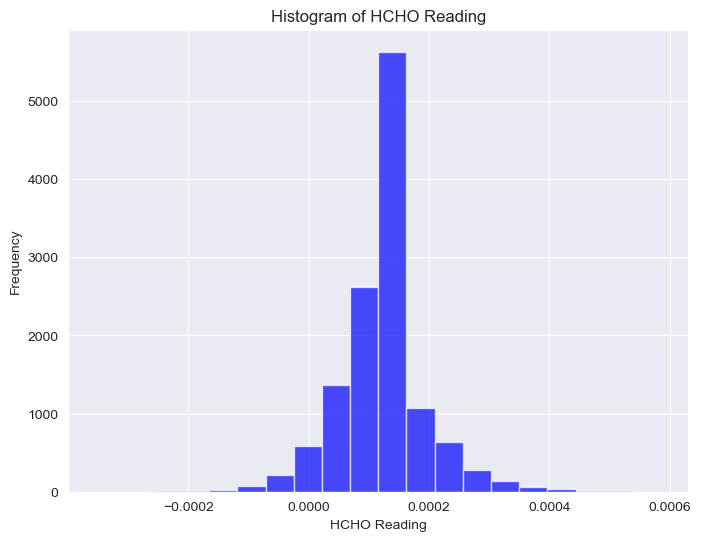

In [7]:
import matplotlib.pyplot as plt

# Visualize data distribution using histograms
plt.figure(figsize=(8, 6))
plt.hist(concatenated_df['HCHO Reading'], bins=20, color='blue', alpha=0.7)
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO Reading')
plt.grid(True)
plt.show()

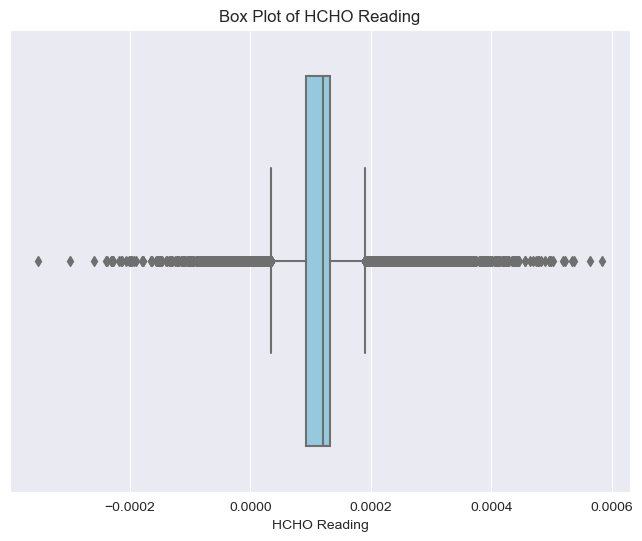

In [8]:
import seaborn as sns
# Visualize data distribution using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=concatenated_df['HCHO Reading'], color='skyblue')
plt.title('Box Plot of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.show()

Spatio-Temporal Analysis


In [9]:
import pandas as pd

# Convert date columns to datetime format
concatenated_df['Current Date'] = pd.to_datetime(concatenated_df['Current Date'])
concatenated_df['Next Date'] = pd.to_datetime(concatenated_df['Next Date'])
concatenated_df

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31


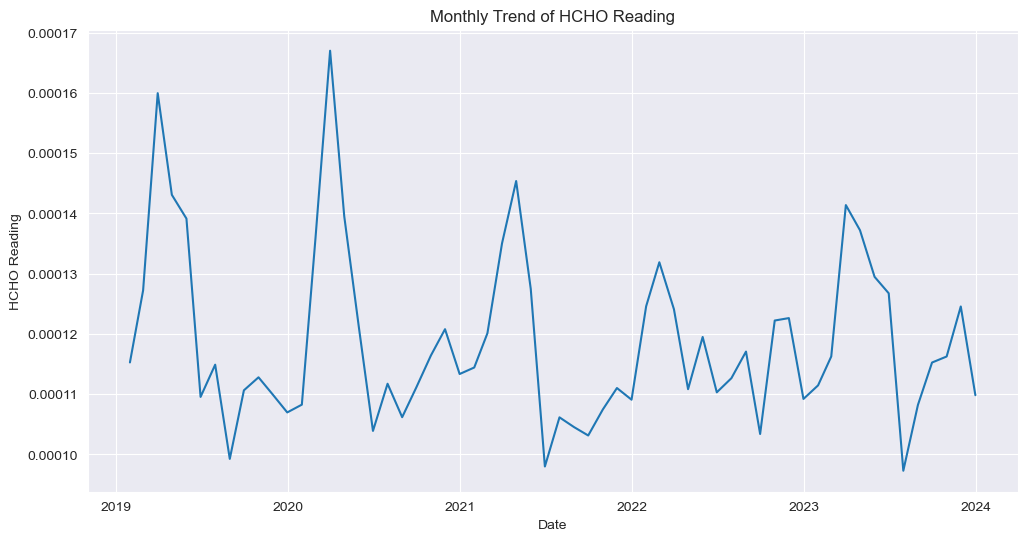

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data based on different time intervals (e.g., monthly)
monthly_data = concatenated_df.resample('M', on='Current Date').mean()  # Resample to monthly frequency

# Visualize trends over time using line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_data.index, y=monthly_data['HCHO Reading'])
plt.title('Monthly Trend of HCHO Reading')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)
plt.show()

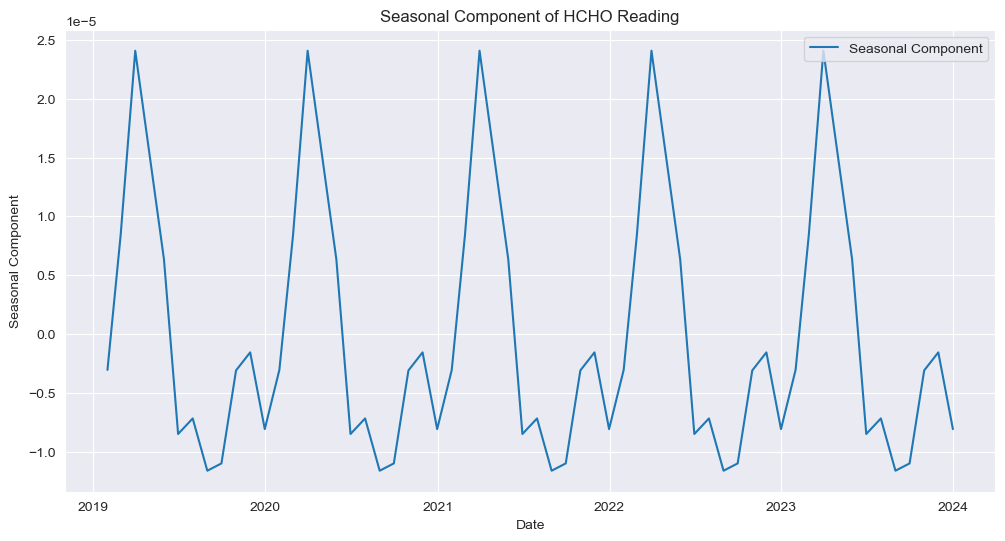

In [11]:
# Identify seasonal variations using seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(monthly_data['HCHO Reading'], period=12)  # Assuming a yearly seasonality
seasonal = decomposition.seasonal

# Visualize seasonal variations
plt.figure(figsize=(12, 6))
plt.plot(seasonal, label='Seasonal Component')
plt.title('Seasonal Component of HCHO Reading')
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.legend()
plt.grid(True)
plt.show()

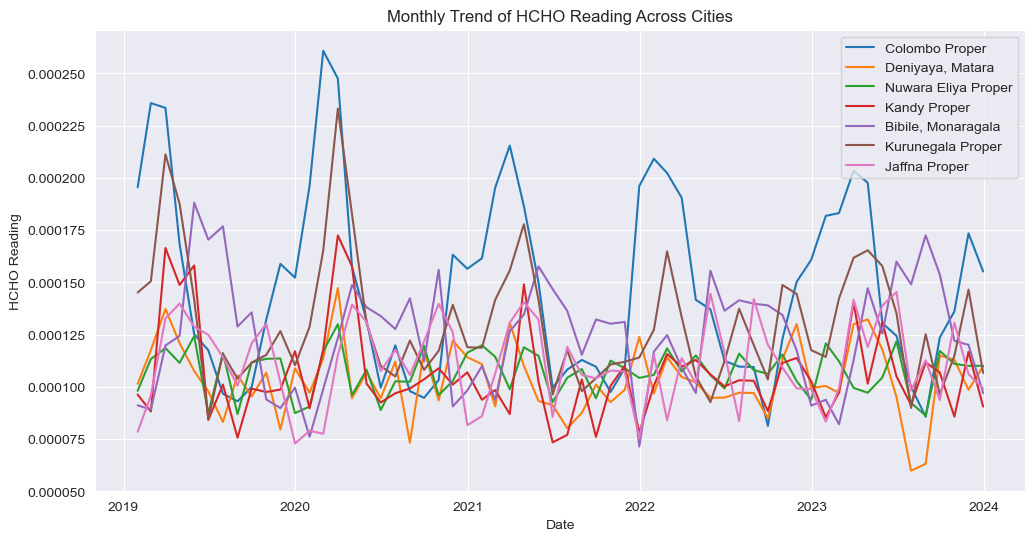

In [12]:
# Compare trends across cities (if applicable)
# Assuming data is grouped by city, you can plot multiple time series on the same plot or create separate plots for each city
# Example:
cities = concatenated_df['Location'].unique()
plt.figure(figsize=(12, 6))
for city in cities:
    city_data = concatenated_df[concatenated_df['Location'] == city]
    city_monthly_data = city_data.resample('M', on='Current Date').mean()
    sns.lineplot(x=city_monthly_data.index, y=city_monthly_data['HCHO Reading'], label=city)
plt.title('Monthly Trend of HCHO Reading Across Cities')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

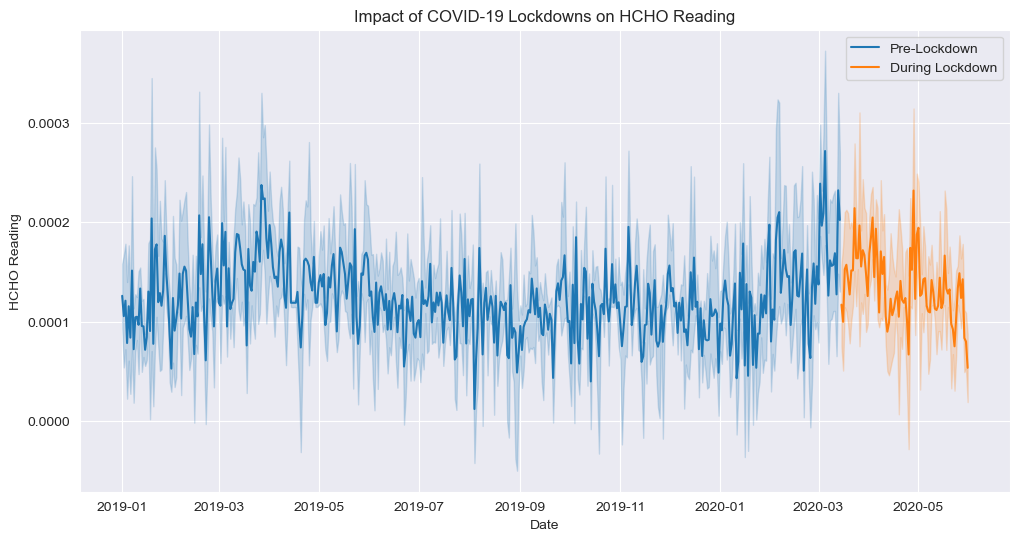

In [13]:
# Analyze impact of COVID-19 lockdowns (if applicable)
# You can filter the data to include only the period during COVID-19 lockdowns and compare it with the period before lockdowns
lockdown_start_date = pd.to_datetime("2020-03-15")
lockdown_end_date = pd.to_datetime("2020-05-31")

lockdown_data = concatenated_df[(concatenated_df['Current Date'] >= lockdown_start_date) & (concatenated_df['Current Date'] <= lockdown_end_date)]
pre_lockdown_data = concatenated_df[concatenated_df['Current Date'] < lockdown_start_date]

# Plot HCHO readings before and during lockdown
plt.figure(figsize=(12, 6))
sns.lineplot(x=pre_lockdown_data['Current Date'], y=pre_lockdown_data['HCHO Reading'], label='Pre-Lockdown')
sns.lineplot(x=lockdown_data['Current Date'], y=lockdown_data['HCHO Reading'], label='During Lockdown')
plt.title('Impact of COVID-19 Lockdowns on HCHO Reading')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
import pandas as pd

concatenated_df['date_column'] = pd.to_datetime(concatenated_df['Current Date'])

earliest_date = concatenated_df['Current Date'].min()
latest_date = concatenated_df['Current Date'].max()

print("Date Range:", earliest_date.date(), "to", latest_date.date())

Date Range: 2019-01-01 to 2023-12-31


In [15]:
external_data = pd.read_csv("external_data.csv")
external_data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,TAVG,TMAX,TMIN
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0
...,...,...,...,...,...,...,...,...,...,...
8740,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0
8741,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN
8742,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0
8743,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN


In [16]:
external_data['date'] = pd.to_datetime(external_data['DATE'])

# Filter data for the specified date range
start_date = '2019-01-01'
end_date = '2023-12-31'

filtered_data = external_data[(external_data['date'] >= start_date) & (external_data['date'] <= end_date)]

In [17]:
external_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    8745 non-null   object        
 1   NAME       8745 non-null   object        
 2   LATITUDE   8745 non-null   float64       
 3   LONGITUDE  8745 non-null   float64       
 4   ELEVATION  8745 non-null   float64       
 5   DATE       8745 non-null   object        
 6   PRCP       8708 non-null   float64       
 7   TAVG       8745 non-null   int64         
 8   TMAX       7786 non-null   float64       
 9   TMIN       7099 non-null   float64       
 10  date       8745 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 751.6+ KB


In [18]:
# Convert column names to lowercase
external_data.columns = external_data.columns.str.lower()
external_data

,station,name,latitude,longitude,elevation,date,prcp,tavg,tmax,tmin,date
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0,2019-01-02
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0,2019-01-03
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0,2019-01-04
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0,2019-01-05
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0,2019-01-06
...,...,...,...,...,...,...,...,...,...,...,...
8740,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0,2023-12-27
8741,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN,2023-12-28
8742,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0,2023-12-29
8743,CEM00043424,"PUTTALAM, CE",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN,2023-12-30


In [19]:
# Convert all data to lowercase
external_data = external_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
external_data

,station,name,latitude,longitude,elevation,date,prcp,tavg,tmax,tmin,date
0,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0,2019-01-02
1,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0,2019-01-03
2,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0,2019-01-04
3,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0,2019-01-05
4,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0,2019-01-06
...,...,...,...,...,...,...,...,...,...,...,...
8740,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0,2023-12-27
8741,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN,2023-12-28
8742,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0,2023-12-29
8743,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN,2023-12-30


In [20]:
unique_values = external_data['name'].unique()

print(unique_values)

['kurunegala, ce' 'china bay, ce' 'colombo, ce' 'nuwara eliya, ce'
 'puttalam, ce']


In [21]:
concatenated_df

,HCHO Reading,Location,Current Date,Next Date,date_column
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019-01-01
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019-01-02
2,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019-01-03
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019-01-04
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
12772,0.000122,Jaffna Proper,2023-12-27,2023-12-28,2023-12-27
12773,0.000051,Jaffna Proper,2023-12-28,2023-12-29,2023-12-28
12774,0.000127,Jaffna Proper,2023-12-29,2023-12-30,2023-12-29
12775,0.000117,Jaffna Proper,2023-12-30,2023-12-31,2023-12-30


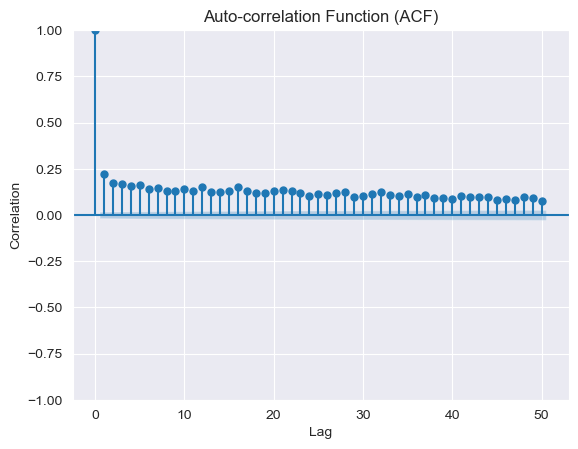

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your time series data is stored in a DataFrame called 'data'
# and the column containing the time series is 'HCHO Reading'

# Calculate auto-correlation
autocorrelation = concatenated_df['HCHO Reading'].autocorr()

# Plot auto-correlation function
plot_acf(concatenated_df['HCHO Reading'], lags=50)  # Adjust the number of lags as needed
plt.title('Auto-correlation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


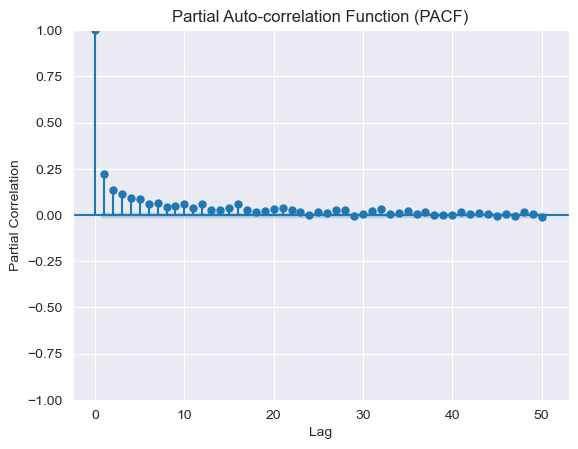

In [23]:
# Plot partial auto-correlation function
plot_pacf(concatenated_df['HCHO Reading'], lags=50)  # Adjust the number of lags as needed
plt.title('Partial Auto-correlation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Correlation')
plt.show()

In [24]:
external_data.rename(columns={'name': 'Location', 'date': 'Current Date'}, inplace=True)
external_data

,station,Location,latitude,longitude,elevation,Current Date,prcp,tavg,tmax,tmin,Current Date
0,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-02,0.00,78,NaN,72.0,2019-01-02
1,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-03,0.00,81,87.0,71.0,2019-01-03
2,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-04,0.00,83,88.0,69.0,2019-01-04
3,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-05,0.00,84,90.0,65.0,2019-01-05
4,cem00043441,"kurunegala, ce",7.467,80.367,116.0,2019-01-06,0.00,82,88.0,71.0,2019-01-06
...,...,...,...,...,...,...,...,...,...,...,...
8740,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-27,0.00,81,90.0,76.0,2023-12-27
8741,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-28,0.01,80,87.0,NaN,2023-12-28
8742,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-29,0.52,80,86.0,76.0,2023-12-29
8743,cem00043424,"puttalam, ce",8.033,79.833,2.0,2023-12-30,0.48,78,87.0,NaN,2023-12-30


In [25]:
# Check for missing values in the entire DataFrame
missing_values_total = external_data.isna().sum()

print("Missing Values in Each Column:")
print(missing_values_total)

Missing Values in Each Column:
station            0
Location           0
latitude           0
longitude          0
elevation          0
Current Date       0
prcp              37
tavg               0
tmax             959
tmin            1646
Current Date       0
dtype: int64


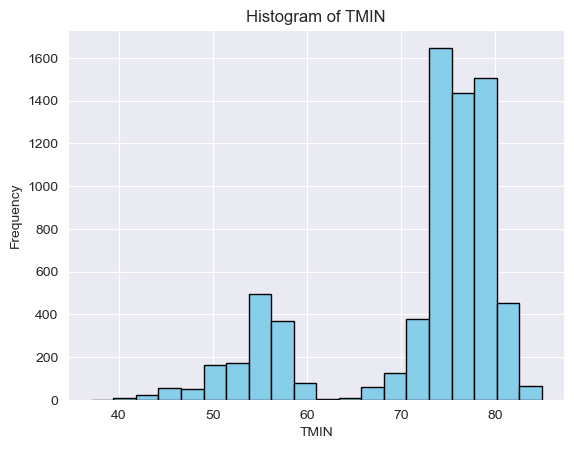

In [26]:
# Filter out NaN values in the 'TMIN' column
tmin_values = external_data['tmin'].dropna()

# Create the histogram
plt.hist(tmin_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMIN')
plt.ylabel('Frequency')
plt.title('Histogram of TMIN')

# Show the plot
plt.show()

In [27]:
# Assuming 'external_data' is your DataFrame

# Generate statistical report for the 'TMIN' column
tmin_report = external_data['tmin'].describe()

print("Statistical Report for TMIN Column:")
print(tmin_report)


Statistical Report for TMIN Column:
count    7099.000000
mean       71.878856
std         9.451779
min        37.000000
25%        72.000000
50%        75.000000
75%        78.000000
max        85.000000
Name: tmin, dtype: float64


In [28]:
# Filling null values in the 'TMIN' column with the mean value
mean_tmin = external_data['tmin'].mean()
external_data['tmin'] = external_data['tmin'].fillna(mean_tmin)

In [29]:
tmin_report_updated = external_data['tmin'].describe()
print("Updated Statistical Report for TMIN Column:")
print(tmin_report_updated)

Updated Statistical Report for TMIN Column:
count    8745.000000
mean       71.878856
std         8.515820
min        37.000000
25%        71.878856
50%        74.000000
75%        77.000000
max        85.000000
Name: tmin, dtype: float64


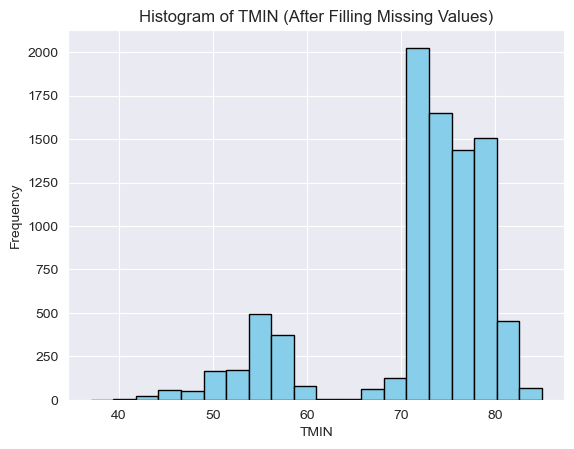

In [30]:
import matplotlib.pyplot as plt

# Create the histogram for the 'TMIN' column
plt.hist(external_data['tmin'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMIN')
plt.ylabel('Frequency')
plt.title('Histogram of TMIN (After Filling Missing Values)')

# Show the plot
plt.show()


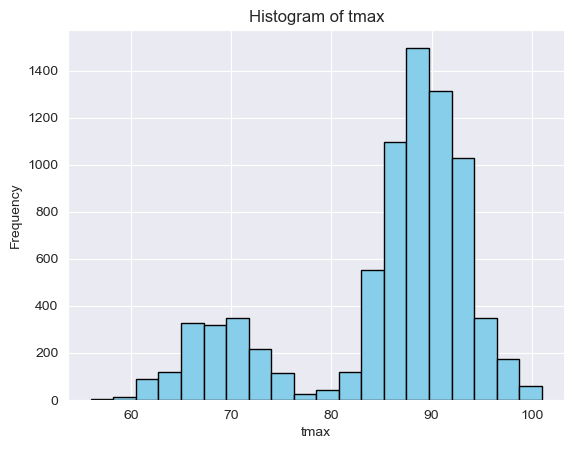

In [31]:
# Filter out NaN values in the 'TMIN' column
tmax_values = external_data['tmax'].dropna()

# Create the histogram
plt.hist(tmax_values, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('tmax')
plt.ylabel('Frequency')
plt.title('Histogram of tmax')

# Show the plot
plt.show()

In [32]:
# Assuming 'external_data' is your DataFrame

# Generate statistical report for the 'TMIN' column
tmax_report = external_data['tmax'].describe()

print("Statistical Report for tmax Column:")
print(tmax_report)

Statistical Report for tmax Column:
count    7786.000000
mean       85.329951
std         9.064695
min        56.000000
25%        84.000000
50%        88.000000
75%        91.000000
max       101.000000
Name: tmax, dtype: float64


In [33]:
mean_tmax = external_data['tmax'].mean()
external_data['tmax'] = external_data['tmax'].fillna(mean_tmax)

# Print the updated statistical report for 'TMAX' column
tmax_report_updated = external_data['tmax'].describe()
print("Updated Statistical Report for TMAX Column:")
print(tmax_report_updated)


Updated Statistical Report for TMAX Column:
count    8745.000000
mean       85.329951
std         8.553177
min        56.000000
25%        85.000000
50%        88.000000
75%        90.000000
max       101.000000
Name: tmax, dtype: float64


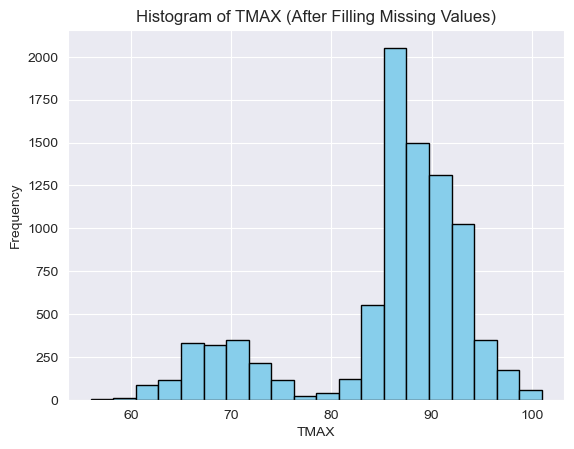

In [34]:
import matplotlib.pyplot as plt

# Create the histogram for the 'TMAX' column
plt.hist(external_data['tmax'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('TMAX')
plt.ylabel('Frequency')
plt.title('Histogram of TMAX (After Filling Missing Values)')

# Show the plot
plt.show()

In [35]:
external_data.isnull().sum()

station          0
Location         0
latitude         0
longitude        0
elevation        0
Current Date     0
prcp            37
tavg             0
tmax             0
tmin             0
Current Date     0
dtype: int64

In [36]:
# Drop rows where 'prcp' column has NaN values
external_data.dropna(subset=['prcp'], inplace=True)

# Drop rows where 'tavg' column has 0 values
external_data = external_data[external_data['tavg'] != 0]

# Drop rows where 'tmax' column has 0 values
external_data = external_data[external_data['tmax'] != 0]

# Verify the changes
print(external_data)

          station        Location  latitude  longitude  elevation  \
0     cem00043441  kurunegala, ce     7.467     80.367      116.0   
1     cem00043441  kurunegala, ce     7.467     80.367      116.0   
2     cem00043441  kurunegala, ce     7.467     80.367      116.0   
3     cem00043441  kurunegala, ce     7.467     80.367      116.0   
4     cem00043441  kurunegala, ce     7.467     80.367      116.0   
...           ...             ...       ...        ...        ...   
8740  cem00043424    puttalam, ce     8.033     79.833        2.0   
8741  cem00043424    puttalam, ce     8.033     79.833        2.0   
8742  cem00043424    puttalam, ce     8.033     79.833        2.0   
8743  cem00043424    puttalam, ce     8.033     79.833        2.0   
8744  cem00043424    puttalam, ce     8.033     79.833        2.0   

     Current Date  prcp  tavg       tmax       tmin Current Date  
0      2019-01-02  0.00    78  85.329951  72.000000   2019-01-02  
1      2019-01-03  0.00    81  87.000

In [37]:
external_data.isnull().sum()

station         0
Location        0
latitude        0
longitude       0
elevation       0
Current Date    0
prcp            0
tavg            0
tmax            0
tmin            0
Current Date    0
dtype: int64

In [38]:
external_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 8744
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   station       8708 non-null   object        
 1   Location      8708 non-null   object        
 2   latitude      8708 non-null   float64       
 3   longitude     8708 non-null   float64       
 4   elevation     8708 non-null   float64       
 5   Current Date  8708 non-null   object        
 6   prcp          8708 non-null   float64       
 7   tavg          8708 non-null   int64         
 8   tmax          8708 non-null   float64       
 9   tmin          8708 non-null   float64       
 10  Current Date  8708 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 816.4+ KB


In [39]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  12777 non-null  float64       
 1   Location      12777 non-null  object        
 2   Current Date  12777 non-null  datetime64[ns]
 3   Next Date     12777 non-null  datetime64[ns]
 4   date_column   12777 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 499.2+ KB


In [40]:
# Assuming your DataFrame is named df
location_mapping = {
    'kurunegala, ce': 'kurunegala',
    'china bay, ce': 'new_china_bay',
    'colombo, ce': 'colombo',
    'nuwara eliya, ce': 'nuwara_eliya',
    'puttalam, ce': 'puttalam'
}

external_data['Location'] = external_data['Location'].replace(location_mapping)

# Check the DataFrame to verify the changes
print(external_data)

          station    Location  latitude  longitude  elevation Current Date  \
0     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-02   
1     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-03   
2     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-04   
3     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-05   
4     cem00043441  kurunegala     7.467     80.367      116.0   2019-01-06   
...           ...         ...       ...        ...        ...          ...   
8740  cem00043424    puttalam     8.033     79.833        2.0   2023-12-27   
8741  cem00043424    puttalam     8.033     79.833        2.0   2023-12-28   
8742  cem00043424    puttalam     8.033     79.833        2.0   2023-12-29   
8743  cem00043424    puttalam     8.033     79.833        2.0   2023-12-30   
8744  cem00043424    puttalam     8.033     79.833        2.0   2023-12-31   

      prcp  tavg       tmax       tmin Current Date  
0     0.0

In [41]:
# Assuming your DataFrame is named df
new_location_names = {
    'Colombo Proper': 'colombo',
    'Deniyaya, Matara': 'matara',
    'Nuwara Eliya Proper': 'nuwara_eliya',
    'Kandy Proper': 'kandy',
    'Bibile, Monaragala': 'monaragala',
    'Kurunegala Proper': 'kurunegala',
    'Jaffna Proper': 'jaffna'
}

concatenated_df['Location'] = concatenated_df['Location'].replace(new_location_names)

# Check the DataFrame to verify the changes
print(concatenated_df)


       HCHO Reading Location Current Date  Next Date date_column
0          0.000197  colombo   2019-01-01 2019-01-02  2019-01-01
1          0.000263  colombo   2019-01-02 2019-01-03  2019-01-02
2          0.000099  colombo   2019-01-03 2019-01-04  2019-01-03
3          0.000210  colombo   2019-01-04 2019-01-05  2019-01-04
4          0.000179  colombo   2019-01-05 2019-01-06  2019-01-05
...             ...      ...          ...        ...         ...
12772      0.000122   jaffna   2023-12-27 2023-12-28  2023-12-27
12773      0.000051   jaffna   2023-12-28 2023-12-29  2023-12-28
12774      0.000127   jaffna   2023-12-29 2023-12-30  2023-12-29
12775      0.000117   jaffna   2023-12-30 2023-12-31  2023-12-30
12776      0.000065   jaffna   2023-12-31 2024-01-01  2023-12-31

[12777 rows x 5 columns]


In [42]:
concatenated_df.to_csv("final_data.csv", index=False)

In [42]:
un = concatenated_df['Location'].unique()
print(un)

['colombo' 'matara' 'nuwara_eliya' 'kandy' 'monaragala' 'kurunegala'
 'jaffna']


In [43]:
cy = external_data['Location'].unique()

print(cy)

['kurunegala' 'new_china_bay' 'colombo' 'nuwara_eliya' 'puttalam']


In [44]:
import pandas as pd

# Assuming your datasets are named df1 and df2
# First, filter the first dataset based on location
filtered_df1 = concatenated_df[concatenated_df['Location'].isin(['colombo', 'matara', 'nuwara_eliya', 'kandy', 'monaragala', 'kurunegala', 'jaffna'])]

# Next, filter the second dataset based on location
filtered_df2 = external_data[external_data['Location'].isin(['colombo', 'nuwara_eliya', 'kurunegala', 'new_china_bay', 'puttalam'])]

# Merge the filtered datasets on the 'Location' column
merged_df = pd.merge(filtered_df1, filtered_df2, on='Location')

# Check the merged DataFrame
print(merged_df)

         HCHO Reading    Location Current Date_x  Next Date date_column  \
0            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
1            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
2            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
3            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
4            0.000197     colombo     2019-01-01 2019-01-02  2019-01-01   
...               ...         ...            ...        ...         ...   
9517177      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517178      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517179      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517180      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   
9517181      0.000122  kurunegala     2023-12-31 2024-01-01  2023-12-31   

             station  latitude  longitude  elevation Current Date_y  prcp  \
0        cem00043466  

In [45]:
c = merged_df['Location'].unique()

print(c)

['colombo' 'nuwara_eliya' 'kurunegala']


Correlation Matrix

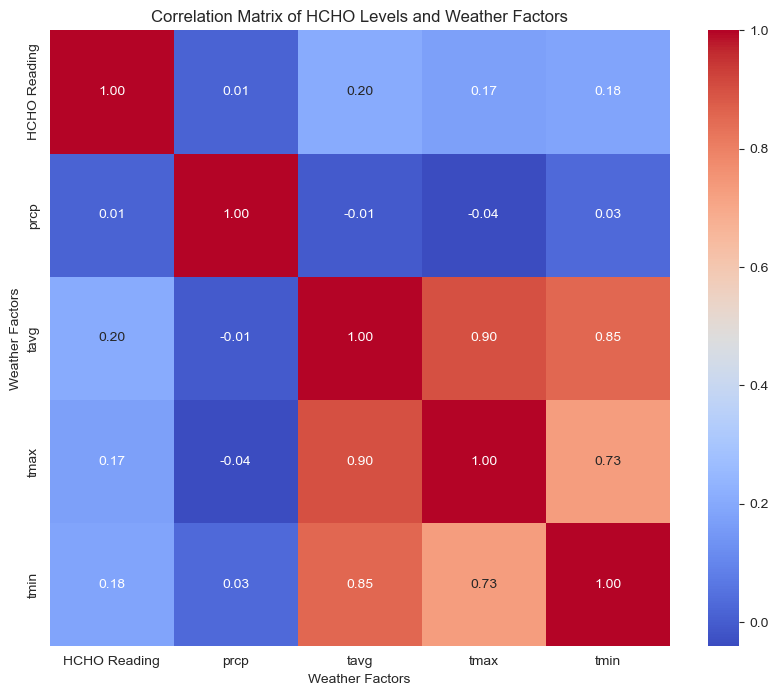

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Now you can analyze the correlation between HCHO levels and weather factors
correlation_matrix = merged_df[['HCHO Reading', 'prcp', 'tavg', 'tmax', 'tmin']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of HCHO Levels and Weather Factors')
plt.xlabel('Weather Factors')
plt.ylabel('Weather Factors')
plt.show()


In [47]:
print(correlation_matrix)

              HCHO Reading      prcp      tavg      tmax      tmin
HCHO Reading      1.000000  0.014237  0.203742  0.173650  0.183548
prcp              0.014237  1.000000 -0.006611 -0.041072  0.031723
tavg              0.203742 -0.006611  1.000000  0.899428  0.853706
tmax              0.173650 -0.041072  0.899428  1.000000  0.728290
tmin              0.183548  0.031723  0.853706  0.728290  1.000000


Spatial Distribution

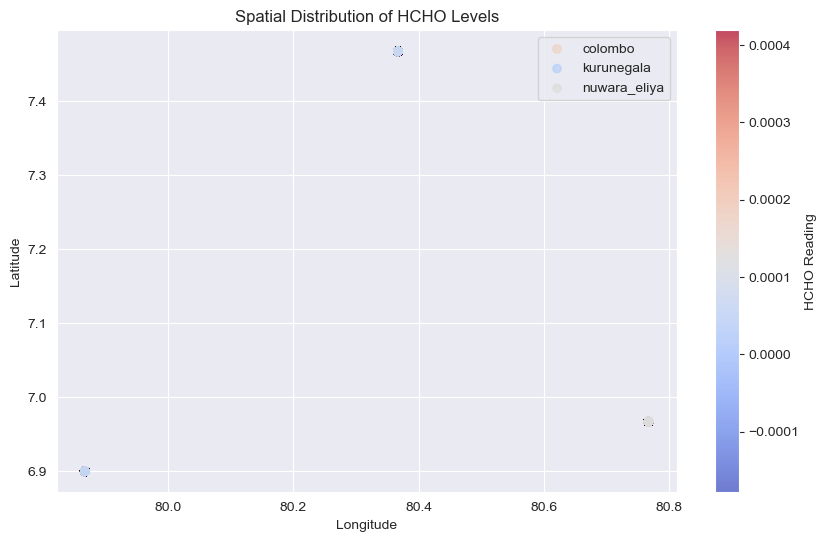

In [48]:
import matplotlib.pyplot as plt

# Plot HCHO levels for each city
plt.figure(figsize=(10, 6))
for city, color in zip(['colombo', 'kurunegala', 'nuwara_eliya'], ['red', 'blue', 'green']):
    city_data = merged_df[merged_df['Location'] == city]
    plt.scatter(city_data['longitude'], city_data['latitude'], c=city_data['HCHO Reading'], cmap='coolwarm', label=city, alpha=0.7)

plt.colorbar(label='HCHO Reading')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of HCHO Levels')
plt.legend()
plt.show()

Colombo Model Building

In [49]:
colombo_df = concatenated_df[concatenated_df['Location'] == 'colombo']
colombo_df

,HCHO Reading,Location,Current Date,Next Date,date_column
0,0.000197,colombo,2019-01-01,2019-01-02,2019-01-01
1,0.000263,colombo,2019-01-02,2019-01-03,2019-01-02
2,0.000099,colombo,2019-01-03,2019-01-04,2019-01-03
3,0.000210,colombo,2019-01-04,2019-01-05,2019-01-04
4,0.000179,colombo,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
1820,0.000118,colombo,2023-12-27,2023-12-28,2023-12-27
1821,0.000120,colombo,2023-12-28,2023-12-29,2023-12-28
1822,0.000120,colombo,2023-12-29,2023-12-30,2023-12-29
1823,0.000140,colombo,2023-12-30,2023-12-31,2023-12-30


In [50]:
# Convert 'Current Date' to datetime and set as index
colombo_df['Current Date'] = pd.to_datetime(colombo_df['Current Date'])
colombo_df.set_index('Current Date', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21156\3476554117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombo_df['Current Date'] = pd.to_datetime(colombo_df['Current Date'])


In [51]:
colombo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  1825 non-null   float64       
 1   Location      1825 non-null   object        
 2   Next Date     1825 non-null   datetime64[ns]
 3   date_column   1825 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB


In [52]:
# Import necessary libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'concatenated_df' is the preprocessed DataFrame

# Split the data into training and validation sets
train_size = int(len(colombo_df) * 0.8)
train, test = colombo_df[:train_size], colombo_df[train_size:]
print(train.shape)

(1460, 4)


In [53]:
# Train the ARIMA model
model = ARIMA(colombo_df['HCHO Reading'][0:1460], order=(1,0,1))  # Example order, adjust as needed
model_fit = model.fit()

l_index = colombo_df.index[-2]
n_index = pd.date_range(start=l_index, periods=31, freq='D')[1:]

# Forecast
forecast = model_fit.forecast(steps=30, index=n_index)
print(forecast)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2023-12-31    0.000241
2024-01-01    0.000241
2024-01-02    0.000240
2024-01-03    0.000239
2024-01-04    0.000239
2024-01-05    0.000238
2024-01-06    0.000237
2024-01-07    0.000237
2024-01-08    0.000236
2024-01-09    0.000236
2024-01-10    0.000235
2024-01-11    0.000234
2024-01-12    0.000234
2024-01-13    0.000233
2024-01-14    0.000233
2024-01-15    0.000232
2024-01-16    0.000232
2024-01-17    0.000231
2024-01-18    0.000230
2024-01-19    0.000230
2024-01-20    0.000229
2024-01-21    0.000229
2024-01-22    0.000228
2024-01-23    0.000228
2024-01-24    0.000227
2024-01-25    0.000227
2024-01-26    0.000226
2024-01-27    0.000226
2024-01-28    0.000225
2024-01-29    0.000225
Freq: D, Name: predicted_mean, dtype: float64


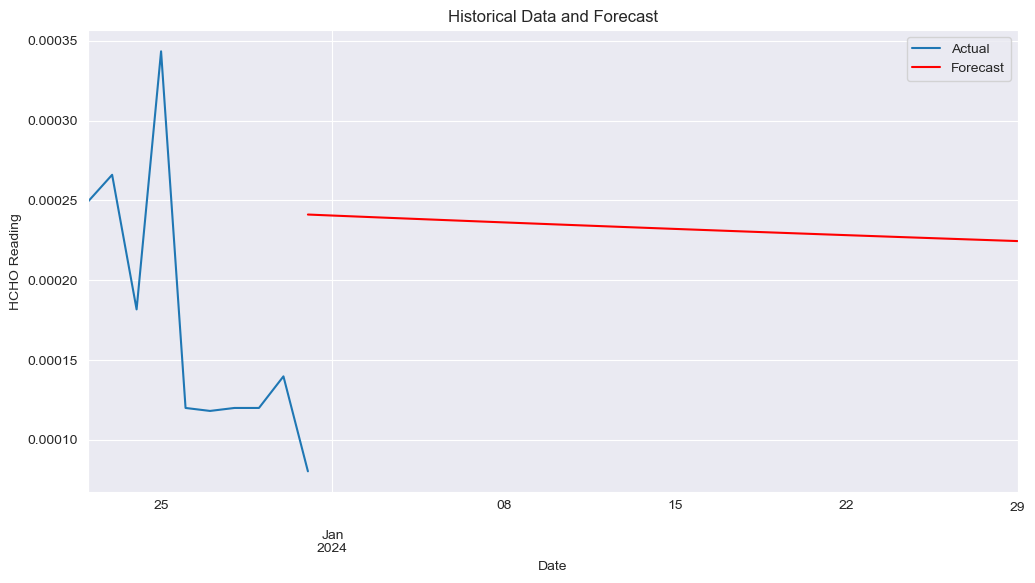

In [54]:
# Plotting
plt.figure(figsize=(12, 6))
colombo_df['HCHO Reading'][-10:].plot(label='Actual')
forecast.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order = (1, 0, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Train the SARIMA model
sarima_model = SARIMAX(colombo_df['HCHO Reading'], order=order, seasonal_order=seasonal_order)
sarima_model_fit = sarima_model.fit()

# Generate date index for forecasting
l_index = colombo_df.index[-2]
n_index = pd.date_range(start=l_index, periods=30, freq='D')  # Forecasting for 30 days

# Forecast
forecast_sarima = sarima_model_fit.forecast(steps=30, index=n_index)
print(forecast_sarima)


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2023-12-30    0.000158
2023-12-31    0.000223
2024-01-01    0.000166
2024-01-02    0.000196
2024-01-03    0.000124
2024-01-04    0.000214
2024-01-05    0.000125
2024-01-06    0.000126
2024-01-07    0.000131
2024-01-08    0.000103
2024-01-09    0.000134
2024-01-10    0.000166
2024-01-11    0.000163
2024-01-12    0.000227
2024-01-13    0.000169
2024-01-14    0.000198
2024-01-15    0.000125
2024-01-16    0.000214
2024-01-17    0.000126
2024-01-18    0.000127
2024-01-19    0.000131
2024-01-20    0.000103
2024-01-21    0.000135
2024-01-22    0.000167
2024-01-23    0.000163
2024-01-24    0.000227
2024-01-25    0.000169
2024-01-26    0.000198
2024-01-27    0.000125
2024-01-28    0.000214
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


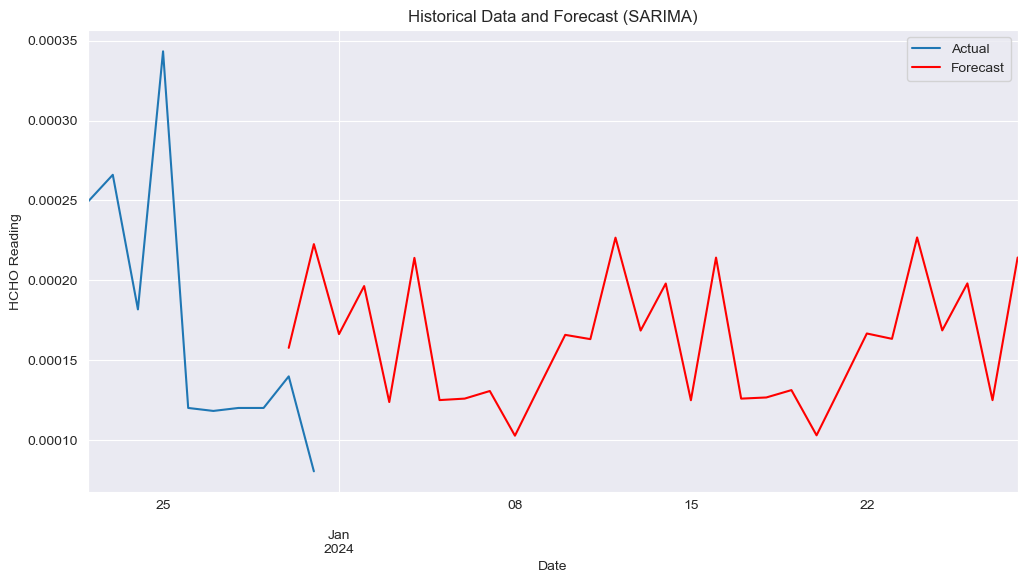

In [56]:
# Plotting
plt.figure(figsize=(12, 6))
colombo_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_sarima.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate ARIMA model
# Calculate forecasts for the test period
forecast_arima = model_fit.forecast(steps=len(test))

# Calculate MSE, MAE, and RMSE for ARIMA
mse_arima = mean_squared_error(test['HCHO Reading'], forecast_arima)
mae_arima = mean_absolute_error(test['HCHO Reading'], forecast_arima)
rmse_arima = np.sqrt(mse_arima)

print("ARIMA Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_arima)
print("Mean Absolute Error (MAE):", mae_arima)
print("Root Mean Squared Error (RMSE):", rmse_arima)

# Evaluate SARIMA model
# Calculate forecasts for the test period
forecast_sarima = sarima_model_fit.forecast(steps=len(test))

# Calculate MSE, MAE, and RMSE for SARIMA
mse_sarima = mean_squared_error(test['HCHO Reading'], forecast_sarima)
mae_sarima = mean_absolute_error(test['HCHO Reading'], forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)

print("\nSARIMA Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_sarima)
print("Mean Absolute Error (MAE):", mae_sarima)
print("Root Mean Squared Error (RMSE):", rmse_sarima)

ARIMA Evaluation Metrics:
Mean Squared Error (MSE): 7.311566772027325e-09
Mean Absolute Error (MAE): 6.964779172502571e-05
Root Mean Squared Error (RMSE): 8.550770007448057e-05

SARIMA Evaluation Metrics:
Mean Squared Error (MSE): 8.022796349950196e-09
Mean Absolute Error (MAE): 6.818883425225493e-05
Root Mean Squared Error (RMSE): 8.957006391618907e-05


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Matara Model Building

In [58]:
matara_df = concatenated_df[concatenated_df['Location'] == 'matara']
matara_df

,HCHO Reading,Location,Current Date,Next Date,date_column
1825,0.000120,matara,2019-01-01,2019-01-02,2019-01-01
1826,0.000006,matara,2019-01-02,2019-01-03,2019-01-02
1827,0.000236,matara,2019-01-03,2019-01-04,2019-01-03
1828,0.000064,matara,2019-01-04,2019-01-05,2019-01-04
1829,0.000053,matara,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
3643,0.000228,matara,2023-12-27,2023-12-28,2023-12-27
3644,0.000120,matara,2023-12-28,2023-12-29,2023-12-28
3645,0.000120,matara,2023-12-29,2023-12-30,2023-12-29
3646,0.000116,matara,2023-12-30,2023-12-31,2023-12-30


In [59]:
# Convert 'Current Date' to datetime and set as index
matara_df['Current Date'] = pd.to_datetime(matara_df['Current Date'])
matara_df.set_index('Current Date', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_21156\3375195563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matara_df['Current Date'] = pd.to_datetime(matara_df['Current Date'])


In [60]:
matara_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1823 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  1823 non-null   float64       
 1   Location      1823 non-null   object        
 2   Next Date     1823 non-null   datetime64[ns]
 3   date_column   1823 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.2+ KB


In [61]:
# Split the data into training and validation sets
train_size_matara = int(len(matara_df) * 0.8)
train_matara, test = matara_df[:train_size_matara], matara_df[train_size_matara:]
print(train_matara.shape)

(1458, 4)


In [62]:
# Train the ARIMA model
model_matara = ARIMA(matara_df['HCHO Reading'][0:1458], order=(1, 0, 1))  # Example order, adjust as needed
model_fit_marata = model_matara.fit()

l_indexa_matara = matara_df.index[-2]
n_index_matara = pd.date_range(start=l_indexa_matara, periods=31, freq='D')[1:]

# Forecast
forecast_matara = model_fit_marata.forecast(steps=30, index=n_index_matara)
print(forecast_matara)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2023-12-31    0.000123
2024-01-01    0.000112
2024-01-02    0.000107
2024-01-03    0.000105
2024-01-04    0.000105
2024-01-05    0.000104
2024-01-06    0.000104
2024-01-07    0.000104
2024-01-08    0.000104
2024-01-09    0.000104
2024-01-10    0.000104
2024-01-11    0.000104
2024-01-12    0.000104
2024-01-13    0.000104
2024-01-14    0.000104
2024-01-15    0.000104
2024-01-16    0.000104
2024-01-17    0.000104
2024-01-18    0.000104
2024-01-19    0.000104
2024-01-20    0.000104
2024-01-21    0.000104
2024-01-22    0.000104
2024-01-23    0.000104
2024-01-24    0.000104
2024-01-25    0.000104
2024-01-26    0.000104
2024-01-27    0.000104
2024-01-28    0.000104
2024-01-29    0.000104
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


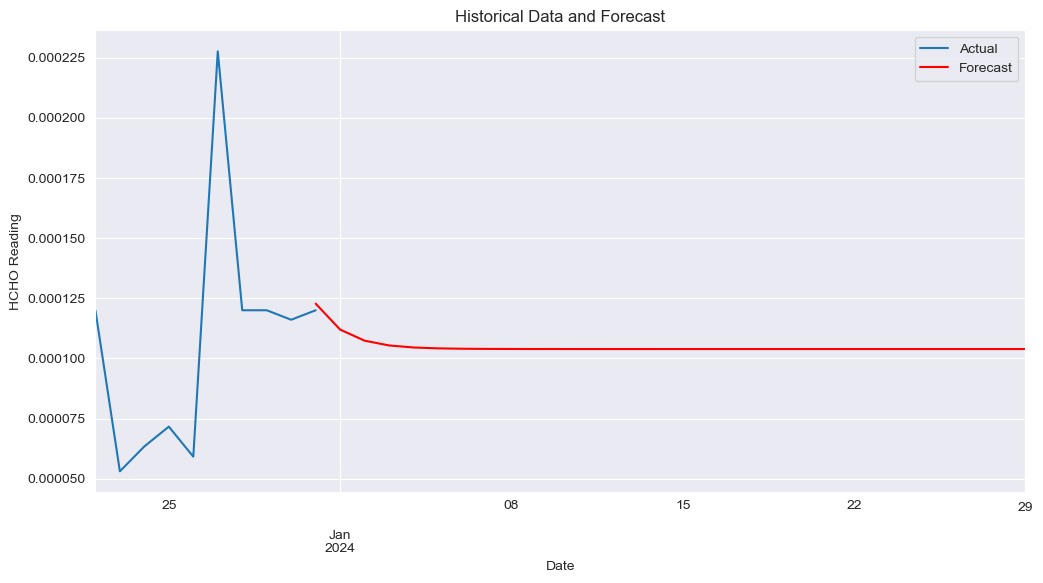

In [63]:
# Plotting
plt.figure(figsize=(12, 6))
matara_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_matara.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order_matara = (1, 0, 1)  # Example order, adjust as needed
seasonal_order_matara = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Train the SARIMA model
sarima_model_matara = SARIMAX(matara_df['HCHO Reading'], order=order_matara, seasonal_order=seasonal_order_matara)
sarima_model_fit_matara = sarima_model_matara.fit()

# Generate date index for forecasting
l_index_matara = matara_df.index[-2]
n_index_matara = pd.date_range(start=l_index_matara, periods=30, freq='D')  # Forecasting for 30 days

# Forecast
forecast_sarima_matara = sarima_model_fit_matara.forecast(steps=30, index=n_index_matara)
print(forecast_sarima_matara)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2023-12-30    0.000120
2023-12-31    0.000073
2024-01-01    0.000117
2024-01-02    0.000083
2024-01-03    0.000086
2024-01-04    0.000066
2024-01-05    0.000117
2024-01-06    0.000153
2024-01-07    0.000107
2024-01-08    0.000118
2024-01-09    0.000116
2024-01-10    0.000098
2024-01-11    0.000119
2024-01-12    0.000071
2024-01-13    0.000117
2024-01-14    0.000082
2024-01-15    0.000085
2024-01-16    0.000066
2024-01-17    0.000115
2024-01-18    0.000156
2024-01-19    0.000107
2024-01-20    0.000118
2024-01-21    0.000116
2024-01-22    0.000098
2024-01-23    0.000119
2024-01-24    0.000071
2024-01-25    0.000117
2024-01-26    0.000082
2024-01-27    0.000085
2024-01-28    0.000066
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


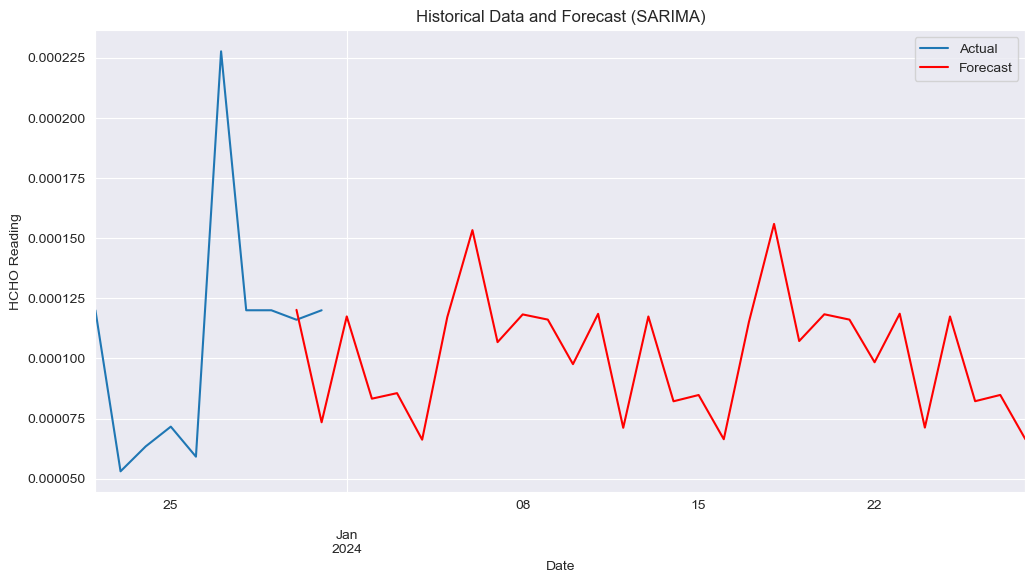

In [65]:
# Plotting
plt.figure(figsize=(12, 6))
matara_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_sarima_matara.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate ARIMA model
# Calculate forecasts for the test data
arima_forecast = model_fit.forecast(steps=len(test))

# Compute MAE, MSE, and RMSE for ARIMA
arima_mae = mean_absolute_error(test['HCHO Reading'], arima_forecast)
arima_mse = mean_squared_error(test['HCHO Reading'], arima_forecast)
arima_rmse = np.sqrt(arima_mse)

print("ARIMA Model Evaluation:")
print("MAE:", arima_mae)
print("MSE:", arima_mse)
print("RMSE:", arima_rmse)

# Evaluate SARIMA model
# Calculate forecasts for the test data
sarima_forecast = sarima_model_fit.forecast(steps=len(test))

# Compute MAE, MSE, and RMSE for SARIMA
sarima_mae = mean_absolute_error(test['HCHO Reading'], sarima_forecast)
sarima_mse = mean_squared_error(test['HCHO Reading'], sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)

print("\nSARIMA Model Evaluation:")
print("MAE:", sarima_mae)
print("MSE:", sarima_mse)
print("RMSE:", sarima_rmse)

ARIMA Model Evaluation:
MAE: 8.803904329428381e-05
MSE: 1.1209550376568795e-08
RMSE: 0.00010587516411590018

SARIMA Model Evaluation:
MAE: 6.895204132047044e-05
MSE: 8.630595997210198e-09
RMSE: 9.290100105601768e-05


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Nuwara Eliya Model Building

In [67]:
nuwara_eliya_df = concatenated_df[concatenated_df['Location'] == 'nuwara_eliya']
nuwara_eliya_df

,HCHO Reading,Location,Current Date,Next Date,date_column
3648,0.000120,nuwara_eliya,2019-01-01,2019-01-02,2019-01-01
3649,0.000120,nuwara_eliya,2019-01-02,2019-01-03,2019-01-02
3650,0.000191,nuwara_eliya,2019-01-03,2019-01-04,2019-01-03
3651,0.000051,nuwara_eliya,2019-01-04,2019-01-05,2019-01-04
3652,0.000065,nuwara_eliya,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
5469,0.000120,nuwara_eliya,2023-12-27,2023-12-28,2023-12-27
5470,0.000120,nuwara_eliya,2023-12-28,2023-12-29,2023-12-28
5471,0.000120,nuwara_eliya,2023-12-29,2023-12-30,2023-12-29
5472,0.000120,nuwara_eliya,2023-12-30,2023-12-31,2023-12-30


In [68]:
# Convert 'Current Date' to datetime and set as index
nuwara_eliya_df['Current Date'] = pd.to_datetime(nuwara_eliya_df['Current Date'])
nuwara_eliya_df.set_index('Current Date', inplace=True)
nuwara_eliya_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  1826 non-null   float64       
 1   Location      1826 non-null   object        
 2   Next Date     1826 non-null   datetime64[ns]
 3   date_column   1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_21156\1272041047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuwara_eliya_df['Current Date'] = pd.to_datetime(nuwara_eliya_df['Current Date'])


In [69]:
# Split the data into training and validation sets
train_size_nuwara_eliya = int(len(nuwara_eliya_df) * 0.8)
train_nuwara_eliya, test = nuwara_eliya_df[:train_size_nuwara_eliya], nuwara_eliya_df[train_size_nuwara_eliya:]
print(train_nuwara_eliya.shape)

(1460, 4)


In [70]:
# Train the ARIMA model
model_nuwara_eliya = ARIMA(nuwara_eliya_df['HCHO Reading'][0:1460], order=(1, 0, 1))  # Example order, adjust as needed
model_fit_nuwara_eliya = model_nuwara_eliya.fit()

l_indexa_nuwara_eliya = nuwara_eliya_df.index[-2]
n_index_nuwara_eliya = pd.date_range(start=l_indexa_nuwara_eliya, periods=31, freq='D')[1:]
# Forecast
forecast_nuwara_eliya = model_fit_nuwara_eliya.forecast(steps=30, index=n_index_nuwara_eliya)
print(forecast_nuwara_eliya)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-12-31    0.000106
2024-01-01    0.000108
2024-01-02    0.000106
2024-01-03    0.000108
2024-01-04    0.000106
2024-01-05    0.000108
2024-01-06    0.000106
2024-01-07    0.000108
2024-01-08    0.000106
2024-01-09    0.000108
2024-01-10    0.000107
2024-01-11    0.000108
2024-01-12    0.000107
2024-01-13    0.000108
2024-01-14    0.000107
2024-01-15    0.000107
2024-01-16    0.000107
2024-01-17    0.000107
2024-01-18    0.000107
2024-01-19    0.000107
2024-01-20    0.000107
2024-01-21    0.000107
2024-01-22    0.000107
2024-01-23    0.000107
2024-01-24    0.000107
2024-01-25    0.000107
2024-01-26    0.000107
2024-01-27    0.000107
2024-01-28    0.000107
2024-01-29    0.000107
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


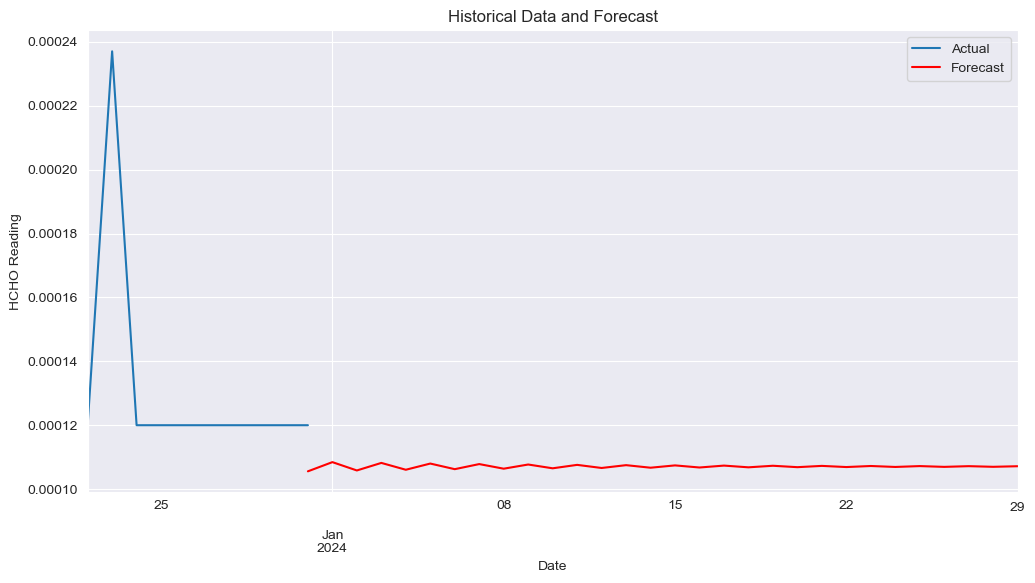

In [71]:
# Plotting
plt.figure(figsize=(12, 6))
nuwara_eliya_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_nuwara_eliya.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order = (1, 0, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Train the SARIMA model
sarima_model_nuwara_eliya = SARIMAX(nuwara_eliya_df['HCHO Reading'], order=order, seasonal_order=seasonal_order)
sarima_model_fit_nuwara_eliya = sarima_model_nuwara_eliya.fit()

# Forecast
forecast_sarima_nuwara_eliya = sarima_model_fit_nuwara_eliya.forecast(steps=30)

print(forecast_sarima_nuwara_eliya)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-01-01    0.000120
2024-01-02    0.000120
2024-01-03    0.000062
2024-01-04    0.000164
2024-01-05    0.000114
2024-01-06    0.000109
2024-01-07    0.000113
2024-01-08    0.000117
2024-01-09    0.000119
2024-01-10    0.000086
2024-01-11    0.000117
2024-01-12    0.000122
2024-01-13    0.000120
2024-01-14    0.000120
2024-01-15    0.000058
2024-01-16    0.000158
2024-01-17    0.000113
2024-01-18    0.000108
2024-01-19    0.000112
2024-01-20    0.000117
2024-01-21    0.000119
2024-01-22    0.000083
2024-01-23    0.000117
2024-01-24    0.000122
2024-01-25    0.000120
2024-01-26    0.000120
2024-01-27    0.000058
2024-01-28    0.000158
2024-01-29    0.000113
2024-01-30    0.000108
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


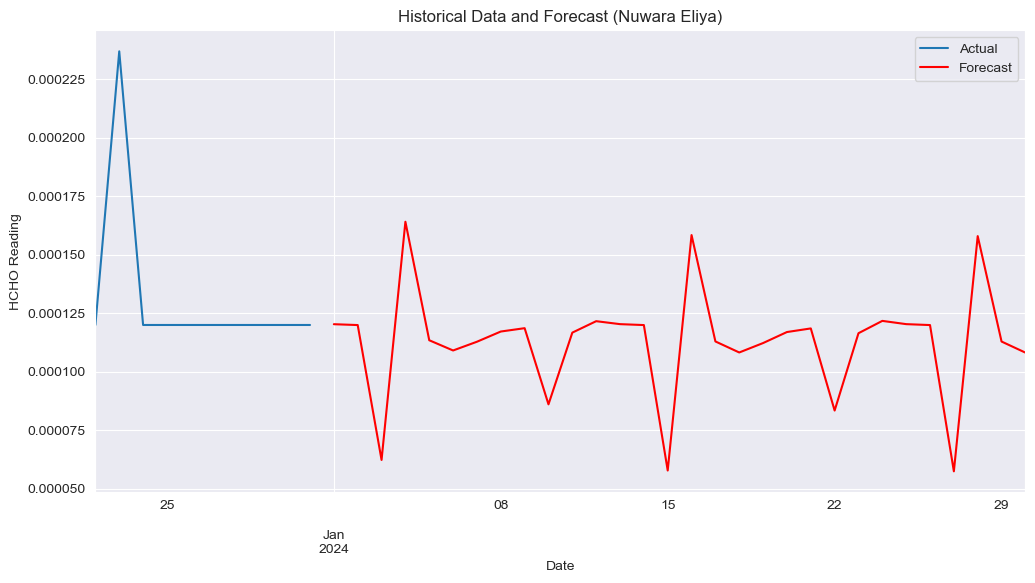

In [73]:
# Plotting
plt.figure(figsize=(12, 6))
nuwara_eliya_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_sarima_nuwara_eliya.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast (Nuwara Eliya)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluate ARIMA model
# Calculate forecasts for the test set
forecast_arima = model_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mse_arima = mean_squared_error(test['HCHO Reading'], forecast_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(test['HCHO Reading'], forecast_arima)

print("ARIMA Model Evaluation:")
print("MSE: ", mse_arima)
print("RMSE: ", rmse_arima)
print("MAE: ", mae_arima)

# SARIMA model evaluation
# Calculate forecasts for the test set
forecast_sarima_nuwara_eliya = sarima_model_fit.forecast(steps=len(test))

# Calculate evaluation metrics
mse_sarima = mean_squared_error(test['HCHO Reading'], forecast_sarima_nuwara_eliya)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(test['HCHO Reading'], forecast_sarima_nuwara_eliya)

print("\nSARIMA Model Evaluation:")
print("MSE: ", mse_sarima)
print("RMSE: ", rmse_sarima)
print("MAE: ", mae_sarima)

ARIMA Model Evaluation:
MSE:  9.233239015576148e-09
RMSE:  9.608974459106522e-05
MAE:  8.035937586583143e-05

SARIMA Model Evaluation:
MSE:  7.180037848133901e-09
RMSE:  8.47351039896329e-05
MAE:  6.156448292241039e-05


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Kandy Model Building

In [75]:
kandy_df = concatenated_df[concatenated_df['Location'] == 'kandy']
kandy_df

,HCHO Reading,Location,Current Date,Next Date,date_column
5474,0.000176,kandy,2019-01-01,2019-01-02,2019-01-01
5475,0.000092,kandy,2019-01-02,2019-01-03,2019-01-02
5476,0.000106,kandy,2019-01-03,2019-01-04,2019-01-03
5477,0.000191,kandy,2019-01-04,2019-01-05,2019-01-04
5478,0.000122,kandy,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
7294,0.000106,kandy,2023-12-27,2023-12-28,2023-12-27
7295,0.000106,kandy,2023-12-28,2023-12-29,2023-12-28
7296,0.000106,kandy,2023-12-29,2023-12-30,2023-12-29
7297,0.000056,kandy,2023-12-30,2023-12-31,2023-12-30


In [76]:
# Convert 'Current Date' to datetime and set as index
kandy_df['Current Date'] = pd.to_datetime(kandy_df['Current Date'])
kandy_df.set_index('Current Date', inplace=True)
kandy_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  1825 non-null   float64       
 1   Location      1825 non-null   object        
 2   Next Date     1825 non-null   datetime64[ns]
 3   date_column   1825 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_21156\1501197754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kandy_df['Current Date'] = pd.to_datetime(kandy_df['Current Date'])


In [77]:
# Split the data into training and validation sets
train_size_kandy = int(len(kandy_df) * 0.8)
train_kandy, test = kandy_df[:train_size_kandy], matara_df[train_size_kandy:]
print(train_kandy.shape)

(1460, 4)


In [78]:
# Train the ARIMA model
model_kandy = ARIMA(kandy_df['HCHO Reading'][0:1460], order=(1, 0, 1))  # Example order, adjust as needed
model_fit_kandy = model_kandy.fit()

l_indexa_kandy = kandy_df.index[-2]
n_index_kandy = pd.date_range(start=l_indexa_kandy, periods=31, freq='D')[1:]
# Forecast
forecast_kandy = model_fit_kandy.forecast(steps=30, index=n_index_kandy)
print(forecast_kandy)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2023-12-31    0.000104
2024-01-01    0.000105
2024-01-02    0.000105
2024-01-03    0.000105
2024-01-04    0.000106
2024-01-05    0.000106
2024-01-06    0.000106
2024-01-07    0.000106
2024-01-08    0.000106
2024-01-09    0.000106
2024-01-10    0.000106
2024-01-11    0.000106
2024-01-12    0.000106
2024-01-13    0.000106
2024-01-14    0.000106
2024-01-15    0.000106
2024-01-16    0.000106
2024-01-17    0.000106
2024-01-18    0.000106
2024-01-19    0.000106
2024-01-20    0.000106
2024-01-21    0.000106
2024-01-22    0.000106
2024-01-23    0.000106
2024-01-24    0.000106
2024-01-25    0.000106
2024-01-26    0.000106
2024-01-27    0.000106
2024-01-28    0.000106
2024-01-29    0.000106
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


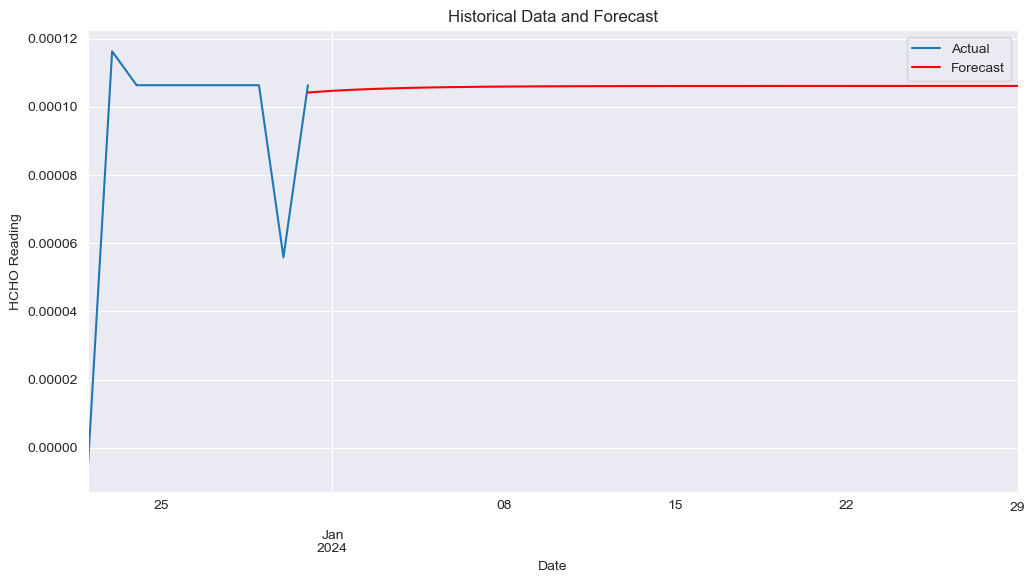

In [79]:
# Plotting
plt.figure(figsize=(12, 6))
kandy_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_kandy.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order_sarima = (1, 0, 1)  # Example order, adjust as needed
seasonal_order_sarima = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Train the SARIMA model
sarima_model_kandy = SARIMAX(kandy_df['HCHO Reading'], order=order_sarima, seasonal_order=seasonal_order_sarima)
sarima_model_fit_kandy = sarima_model_kandy.fit()

# Generate date index for forecasting
l_index_kandy = kandy_df.index[-2]
n_index_kandy = pd.date_range(start=l_index_kandy, periods=30, freq='D')  # Forecasting for 30 days

# Forecast
forecast_sarima_kandy = sarima_model_fit_kandy.forecast(steps=30, index=n_index_kandy)
print(forecast_sarima_kandy)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


2023-12-30    0.000045
2023-12-31    0.000111
2024-01-01    0.000074
2024-01-02    0.000150
2024-01-03    0.000109
2024-01-04    0.000084
2024-01-05    0.000123
2024-01-06    0.000101
2024-01-07    0.000099
2024-01-08    0.000071
2024-01-09    0.000081
2024-01-10    0.000102
2024-01-11    0.000046
2024-01-12    0.000111
2024-01-13    0.000072
2024-01-14    0.000150
2024-01-15    0.000109
2024-01-16    0.000085
2024-01-17    0.000122
2024-01-18    0.000102
2024-01-19    0.000099
2024-01-20    0.000072
2024-01-21    0.000081
2024-01-22    0.000102
2024-01-23    0.000046
2024-01-24    0.000111
2024-01-25    0.000072
2024-01-26    0.000150
2024-01-27    0.000109
2024-01-28    0.000085
Freq: D, Name: predicted_mean, dtype: float64


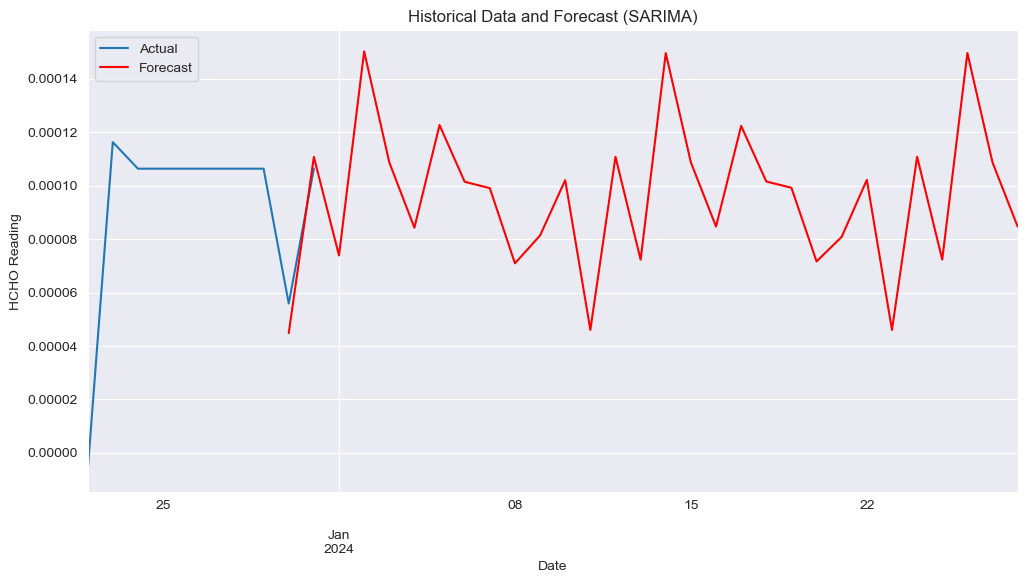

In [81]:
# Plotting
plt.figure(figsize=(12, 6))
kandy_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_sarima_kandy.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Actual values for Kandy
actual_values_kandy = kandy_df['HCHO Reading'][-30:]

# ARIMA forecast values
arima_forecast_values_kandy = forecast_kandy

# SARIMA forecast values
sarima_forecast_values_kandy = forecast_sarima_kandy

# Calculate evaluation metrics for ARIMA
arima_mae = mean_absolute_error(actual_values_kandy, arima_forecast_values_kandy)
arima_mse = mean_squared_error(actual_values_kandy, arima_forecast_values_kandy)
arima_rmse = np.sqrt(arima_mse)

# Calculate evaluation metrics for SARIMA
sarima_mae = mean_absolute_error(actual_values_kandy, sarima_forecast_values_kandy)
sarima_mse = mean_squared_error(actual_values_kandy, sarima_forecast_values_kandy)
sarima_rmse = np.sqrt(sarima_mse)

print("Evaluation metrics for ARIMA:")
print(f"MAE: {arima_mae}")
print(f"MSE: {arima_mse}")
print(f"RMSE: {arima_rmse}")

print("\nEvaluation metrics for SARIMA:")
print(f"MAE: {sarima_mae}")
print(f"MSE: {sarima_mse}")
print(f"RMSE: {sarima_rmse}")

Evaluation metrics for ARIMA:
MAE: 2.8723654439365383e-05
MSE: 3.920302859365808e-09
RMSE: 6.261232194517153e-05

Evaluation metrics for SARIMA:
MAE: 5.047023647127532e-05
MSE: 5.748964731697071e-09
RMSE: 7.582192777618538e-05


Monaragala Model Building

In [83]:
monaragala_df = concatenated_df[concatenated_df['Location'] == 'monaragala']
monaragala_df

,HCHO Reading,Location,Current Date,Next Date,date_column
7299,0.000122,monaragala,2019-01-01,2019-01-02,2019-01-01
7300,0.000019,monaragala,2019-01-02,2019-01-03,2019-01-02
7301,0.000028,monaragala,2019-01-03,2019-01-04,2019-01-03
7302,0.000037,monaragala,2019-01-04,2019-01-05,2019-01-04
7303,-0.000018,monaragala,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
9120,0.000122,monaragala,2023-12-27,2023-12-28,2023-12-27
9121,0.000122,monaragala,2023-12-28,2023-12-29,2023-12-28
9122,0.000122,monaragala,2023-12-29,2023-12-30,2023-12-29
9123,0.000122,monaragala,2023-12-30,2023-12-31,2023-12-30


In [84]:
# Convert 'Current Date' to datetime and set as index
monaragala_df['Current Date'] = pd.to_datetime(monaragala_df['Current Date'])
monaragala_df.set_index('Current Date', inplace=True)
monaragala_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  1826 non-null   float64       
 1   Location      1826 non-null   object        
 2   Next Date     1826 non-null   datetime64[ns]
 3   date_column   1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_21156\2534481484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monaragala_df['Current Date'] = pd.to_datetime(monaragala_df['Current Date'])


In [85]:
# Split the data into training and validation sets
train_size_monaragala = int(len(monaragala_df) * 0.8)
train_monaragala, test = kandy_df[:train_size_monaragala], matara_df[train_size_monaragala:]
print(train_monaragala.shape)

(1460, 4)


In [86]:
# Train the ARIMA model
model_monaragala = ARIMA(monaragala_df['HCHO Reading'][0:1460], order=(1, 0, 1))  # Example order, adjust as needed
model_fit_monaragala = model_monaragala.fit()
l_indexa_monaragala = monaragala_df.index[-2]
n_index_monaragala = pd.date_range(start=l_indexa_monaragala, periods=31, freq='D')[1:]
# Forecast
forecast_monaragala = model_fit_monaragala.forecast(steps=30, index=n_index_monaragala)
print(forecast_monaragala)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-12-31    0.000104
2024-01-01    0.000109
2024-01-02    0.000112
2024-01-03    0.000115
2024-01-04    0.000117
2024-01-05    0.000119
2024-01-06    0.000120
2024-01-07    0.000121
2024-01-08    0.000122
2024-01-09    0.000122
2024-01-10    0.000123
2024-01-11    0.000123
2024-01-12    0.000123
2024-01-13    0.000124
2024-01-14    0.000124
2024-01-15    0.000124
2024-01-16    0.000124
2024-01-17    0.000124
2024-01-18    0.000124
2024-01-19    0.000124
2024-01-20    0.000124
2024-01-21    0.000124
2024-01-22    0.000124
2024-01-23    0.000124
2024-01-24    0.000124
2024-01-25    0.000124
2024-01-26    0.000124
2024-01-27    0.000124
2024-01-28    0.000124
2024-01-29    0.000124
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


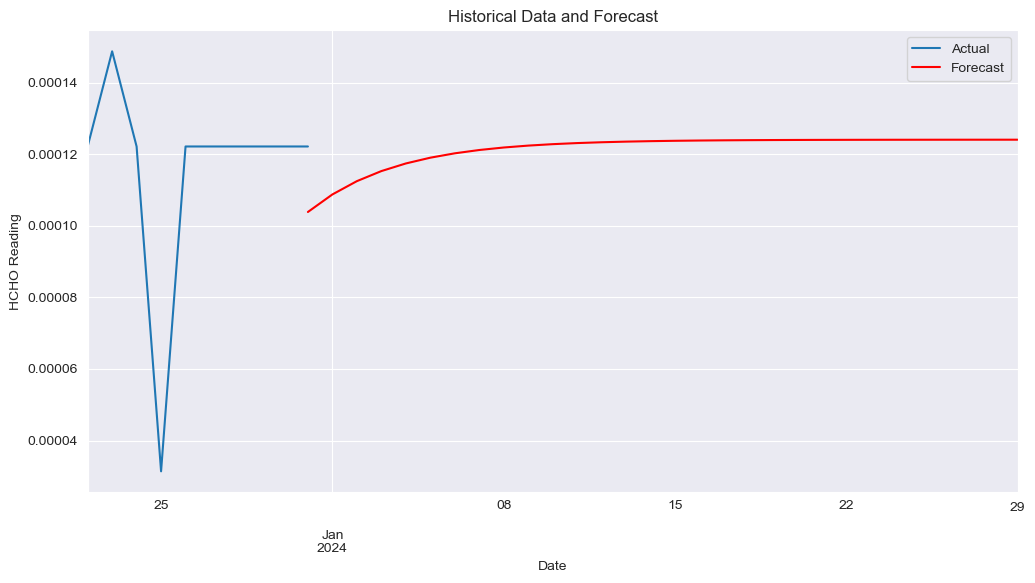

In [87]:
# Plotting
plt.figure(figsize=(12, 6))
monaragala_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_monaragala.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order = (1, 0, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Train the SARIMA model
sarima_model_monaragala = SARIMAX(monaragala_df['HCHO Reading'], order=order, seasonal_order=seasonal_order)
sarima_model_fit_monaragala = sarima_model_monaragala.fit()

# Generate date index for forecasting
l_index_monaragala = monaragala_df.index[-2]
n_index_monaragala = pd.date_range(start=l_index_monaragala, periods=30, freq='D')  # Forecasting for 30 days

# Forecast
forecast_sarima_monaragala = sarima_model_fit_monaragala.forecast(steps=30, index=n_index_monaragala)
print(forecast_sarima_monaragala)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-12-30    0.000093
2023-12-31    0.000088
2024-01-01    0.000062
2024-01-02    0.000145
2024-01-03    0.000129
2024-01-04    0.000084
2024-01-05    0.000128
2024-01-06    0.000123
2024-01-07    0.000099
2024-01-08    0.000116
2024-01-09    0.000106
2024-01-10    0.000131
2024-01-11    0.000092
2024-01-12    0.000087
2024-01-13    0.000062
2024-01-14    0.000145
2024-01-15    0.000129
2024-01-16    0.000083
2024-01-17    0.000128
2024-01-18    0.000123
2024-01-19    0.000100
2024-01-20    0.000116
2024-01-21    0.000107
2024-01-22    0.000131
2024-01-23    0.000092
2024-01-24    0.000087
2024-01-25    0.000062
2024-01-26    0.000145
2024-01-27    0.000129
2024-01-28    0.000083
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


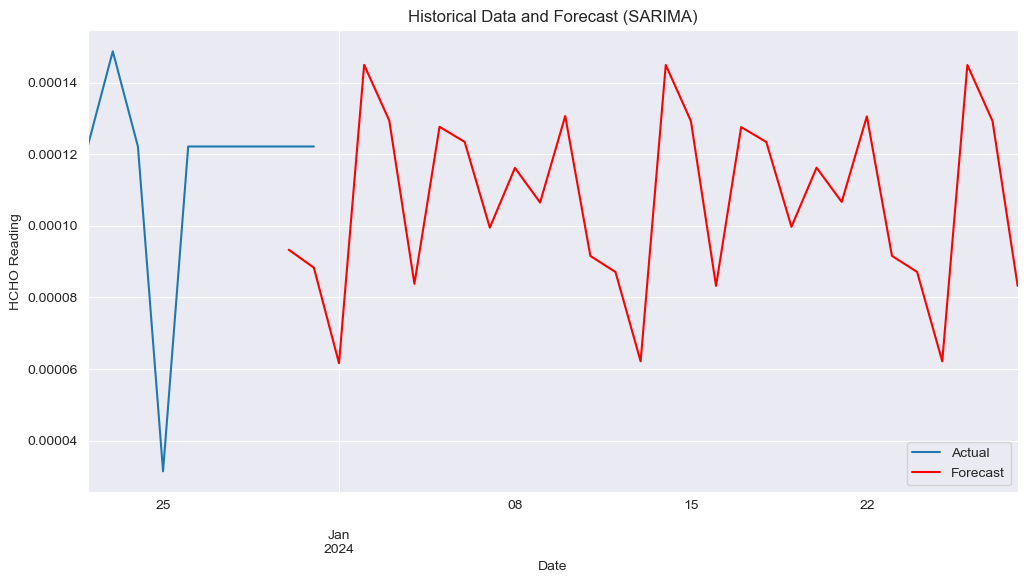

In [89]:
# Plotting
plt.figure(figsize=(12, 6))
monaragala_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_sarima_monaragala.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

Kurunegala Model Building

In [91]:
kurunegala_df = concatenated_df[concatenated_df['Location'] == 'kurunegala']
kurunegala_df

,HCHO Reading,Location,Current Date,Next Date,date_column
9125,0.000088,kurunegala,2019-01-01,2019-01-02,2019-01-01
9126,0.000137,kurunegala,2019-01-02,2019-01-03,2019-01-02
9127,0.000148,kurunegala,2019-01-03,2019-01-04,2019-01-03
9128,-0.000002,kurunegala,2019-01-04,2019-01-05,2019-01-04
9129,0.000249,kurunegala,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
10946,0.000075,kurunegala,2023-12-27,2023-12-28,2023-12-27
10947,0.000122,kurunegala,2023-12-28,2023-12-29,2023-12-28
10948,0.000122,kurunegala,2023-12-29,2023-12-30,2023-12-29
10949,0.000158,kurunegala,2023-12-30,2023-12-31,2023-12-30


In [92]:
# Convert 'Current Date' to datetime and set as index
kurunegala_df['Current Date'] = pd.to_datetime(kurunegala_df['Current Date'])
kurunegala_df.set_index('Current Date', inplace=True)
kurunegala_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  1826 non-null   float64       
 1   Location      1826 non-null   object        
 2   Next Date     1826 non-null   datetime64[ns]
 3   date_column   1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_21156\3776525793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kurunegala_df['Current Date'] = pd.to_datetime(kurunegala_df['Current Date'])


In [93]:
# Split the data into training and validation sets
train_size_kurunegala = int(len(kurunegala_df) * 0.8)
train_kurunegala, test = kurunegala_df[:train_size_kurunegala], matara_df[train_size_kurunegala:]
print(train_kurunegala.shape)

(1460, 4)


In [94]:
# Train the ARIMA model
model_kurunegala = ARIMA(kurunegala_df['HCHO Reading'][0:1460], order=(1, 0, 1))  # Example order, adjust as needed
model_fit_kurunegala = model_kurunegala.fit()

l_indexa_kurunegala = kurunegala_df.index[-2]
n_index_kurunegala = pd.date_range(start=l_indexa_kurunegala, periods=31, freq='D')[1:]
# Forecast
forecast_kurunegala = model_fit_kurunegala.forecast(steps=30, index=n_index_kurunegala)
print(forecast_kurunegala)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-12-31    0.000140
2024-01-01    0.000139
2024-01-02    0.000137
2024-01-03    0.000136
2024-01-04    0.000135
2024-01-05    0.000135
2024-01-06    0.000134
2024-01-07    0.000133
2024-01-08    0.000133
2024-01-09    0.000133
2024-01-10    0.000132
2024-01-11    0.000132
2024-01-12    0.000132
2024-01-13    0.000131
2024-01-14    0.000131
2024-01-15    0.000131
2024-01-16    0.000131
2024-01-17    0.000131
2024-01-18    0.000131
2024-01-19    0.000131
2024-01-20    0.000131
2024-01-21    0.000131
2024-01-22    0.000130
2024-01-23    0.000130
2024-01-24    0.000130
2024-01-25    0.000130
2024-01-26    0.000130
2024-01-27    0.000130
2024-01-28    0.000130
2024-01-29    0.000130
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


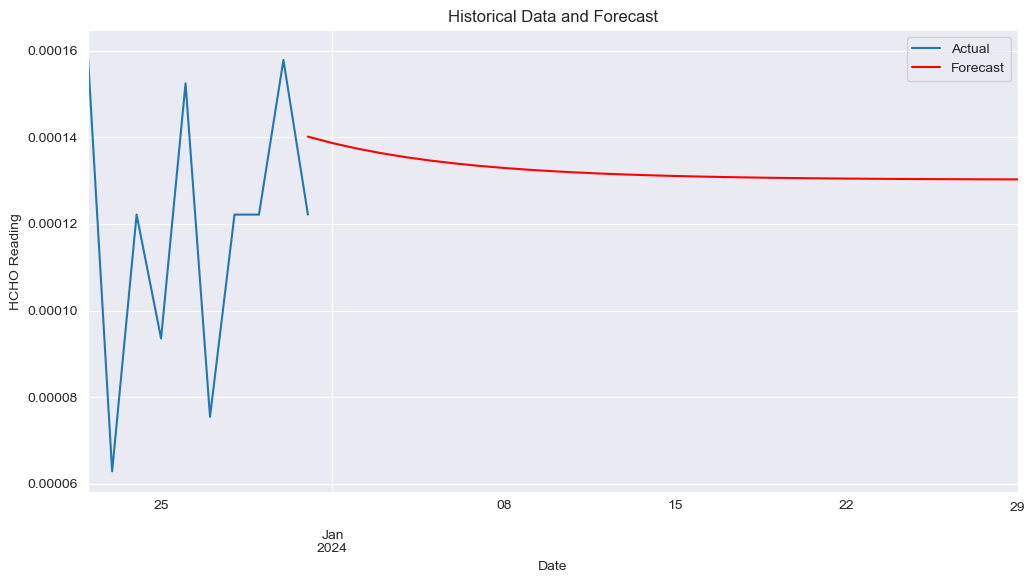

In [95]:
# Plotting
plt.figure(figsize=(12, 6))
kurunegala_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_kurunegala.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order_sarima = (1, 0, 1)  # Example order, adjust as needed
seasonal_order_sarima = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Train the SARIMA model
sarima_model_kurunegala = SARIMAX(kurunegala_df['HCHO Reading'], order=order_sarima, seasonal_order=seasonal_order_sarima)
sarima_model_fit_kurunegala = sarima_model_kurunegala.fit()

# Forecast
forecast_sarima_kurunegala = sarima_model_fit_kurunegala.forecast(steps=30)

print(forecast_sarima_kurunegala)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2024-01-01    0.000112
2024-01-02    0.000101
2024-01-03    0.000128
2024-01-04    0.000135
2024-01-05    0.000138
2024-01-06    0.000076
2024-01-07    0.000156
2024-01-08    0.000100
2024-01-09    0.000118
2024-01-10    0.000069
2024-01-11    0.000119
2024-01-12    0.000169
2024-01-13    0.000115
2024-01-14    0.000102
2024-01-15    0.000129
2024-01-16    0.000134
2024-01-17    0.000138
2024-01-18    0.000076
2024-01-19    0.000156
2024-01-20    0.000100
2024-01-21    0.000118
2024-01-22    0.000069
2024-01-23    0.000119
2024-01-24    0.000169
2024-01-25    0.000115
2024-01-26    0.000102
2024-01-27    0.000129
2024-01-28    0.000134
2024-01-29    0.000138
2024-01-30    0.000076
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


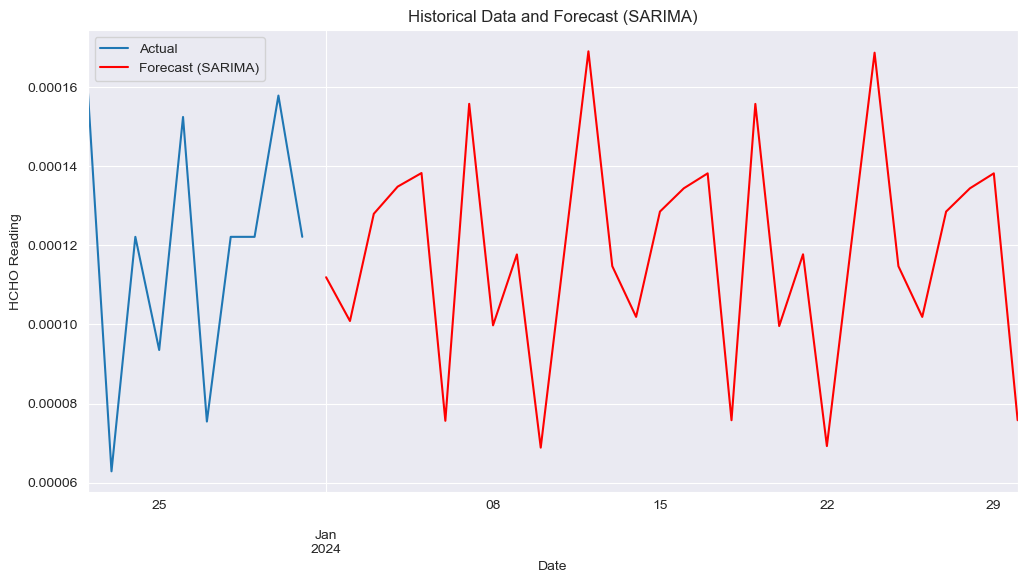

In [97]:
# Plotting
plt.figure(figsize=(12, 6))
kurunegala_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_sarima_kurunegala.plot(color='red', label='Forecast (SARIMA)')
plt.title('Historical Data and Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

Jaffna Model Building

In [98]:
jaffna_df = concatenated_df[concatenated_df['Location'] == 'jaffna']
jaffna_df

,HCHO Reading,Location,Current Date,Next Date,date_column
10951,0.000058,jaffna,2019-01-01,2019-01-02,2019-01-01
10952,0.000102,jaffna,2019-01-02,2019-01-03,2019-01-02
10953,0.000039,jaffna,2019-01-03,2019-01-04,2019-01-03
10954,-0.000002,jaffna,2019-01-04,2019-01-05,2019-01-04
10955,0.000159,jaffna,2019-01-05,2019-01-06,2019-01-05
...,...,...,...,...,...
12772,0.000122,jaffna,2023-12-27,2023-12-28,2023-12-27
12773,0.000051,jaffna,2023-12-28,2023-12-29,2023-12-28
12774,0.000127,jaffna,2023-12-29,2023-12-30,2023-12-29
12775,0.000117,jaffna,2023-12-30,2023-12-31,2023-12-30


In [99]:
# Convert 'Current Date' to datetime and set as index
jaffna_df['Current Date'] = pd.to_datetime(jaffna_df['Current Date'])
jaffna_df.set_index('Current Date', inplace=True)
jaffna_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   HCHO Reading  1826 non-null   float64       
 1   Location      1826 non-null   object        
 2   Next Date     1826 non-null   datetime64[ns]
 3   date_column   1826 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 71.3+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_21156\3684494968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaffna_df['Current Date'] = pd.to_datetime(jaffna_df['Current Date'])


In [100]:
# Split the data into training and validation sets
train_size_jaffna = int(len(jaffna_df) * 0.8)
train_jaffna, test = jaffna_df[:train_size_jaffna], jaffna_df[train_size_jaffna:]
print(train_jaffna.shape)

(1460, 4)


In [101]:
# Train the ARIMA model
model_jaffna = ARIMA(jaffna_df['HCHO Reading'][0:1460], order=(1, 0, 1))  # Example order, adjust as needed
model_fit_jaffna = model_jaffna.fit()

l_indexa_jaffna = jaffna_df.index[-2]
n_index_jaffna = pd.date_range(start=l_indexa_jaffna, periods=31, freq='D')[1:]
# Forecast
forecast_jaffna = model_fit_jaffna.forecast(steps=30, index=n_index_jaffna)
print(forecast_jaffna)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-12-31    0.000111
2024-01-01    0.000111
2024-01-02    0.000111
2024-01-03    0.000111
2024-01-04    0.000111
2024-01-05    0.000111
2024-01-06    0.000111
2024-01-07    0.000111
2024-01-08    0.000111
2024-01-09    0.000111
2024-01-10    0.000111
2024-01-11    0.000111
2024-01-12    0.000111
2024-01-13    0.000111
2024-01-14    0.000111
2024-01-15    0.000111
2024-01-16    0.000111
2024-01-17    0.000111
2024-01-18    0.000111
2024-01-19    0.000111
2024-01-20    0.000111
2024-01-21    0.000111
2024-01-22    0.000111
2024-01-23    0.000111
2024-01-24    0.000111
2024-01-25    0.000111
2024-01-26    0.000111
2024-01-27    0.000111
2024-01-28    0.000111
2024-01-29    0.000111
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


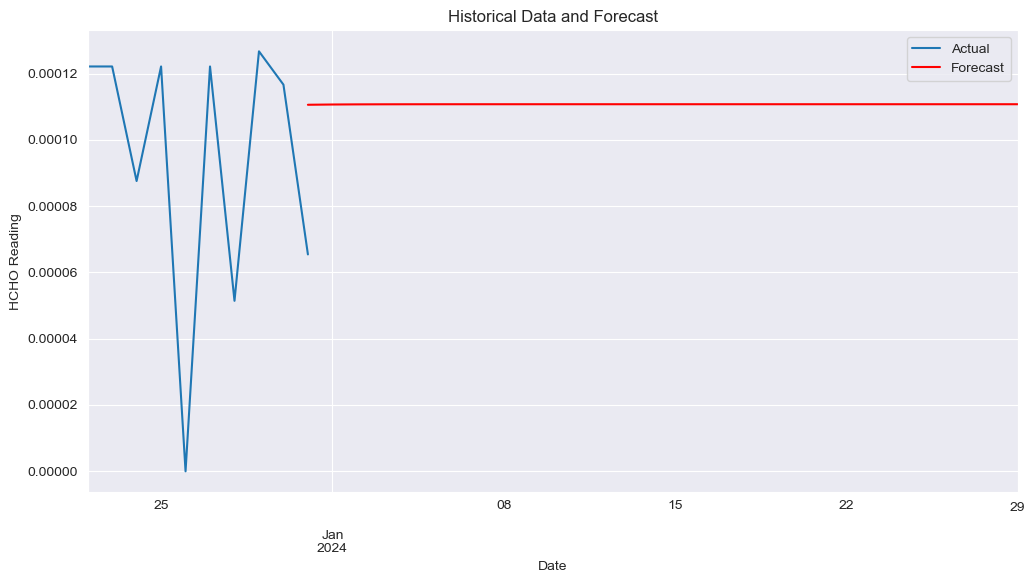

In [102]:
# Plotting
plt.figure(figsize=(12, 6))
jaffna_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_jaffna.plot(color='red', label='Forecast')
plt.title('Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
order = (1, 0, 1)  # Example order, adjust as needed
seasonal_order = (1, 1, 1, 12)  # Example seasonal order, adjust as needed

# Train the SARIMA model
sarima_model_jaffna = SARIMAX(jaffna_df['HCHO Reading'], order=order, seasonal_order=seasonal_order)
sarima_model_fit_jaffna = sarima_model_jaffna.fit()

# Generate date index for forecasting
l_index_jaffna = jaffna_df.index[-2]
n_index_jaffna = pd.date_range(start=l_index_jaffna, periods=30, freq='D')  # Forecasting for 30 days

# Forecast
forecast_sarima_jaffna = sarima_model_fit_jaffna.forecast(steps=30, index=n_index_jaffna)
print(forecast_sarima_jaffna)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-12-30    0.000110
2023-12-31    0.000104
2024-01-01    0.000118
2024-01-02    0.000111
2024-01-03    0.000067
2024-01-04    0.000106
2024-01-05    0.000092
2024-01-06    0.000129
2024-01-07    0.000093
2024-01-08    0.000117
2024-01-09    0.000109
2024-01-10    0.000081
2024-01-11    0.000113
2024-01-12    0.000105
2024-01-13    0.000118
2024-01-14    0.000111
2024-01-15    0.000067
2024-01-16    0.000106
2024-01-17    0.000092
2024-01-18    0.000129
2024-01-19    0.000093
2024-01-20    0.000117
2024-01-21    0.000109
2024-01-22    0.000081
2024-01-23    0.000113
2024-01-24    0.000105
2024-01-25    0.000118
2024-01-26    0.000111
2024-01-27    0.000067
2024-01-28    0.000106
Freq: D, Name: predicted_mean, dtype: float64


C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


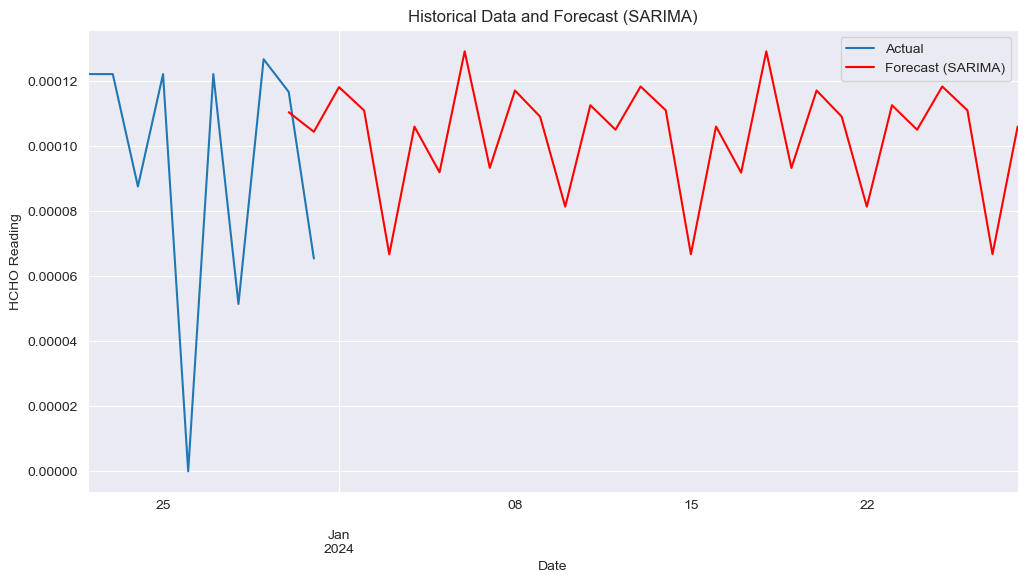

In [104]:
# Plotting
plt.figure(figsize=(12, 6))
jaffna_df['HCHO Reading'][-10:].plot(label='Actual')
forecast_sarima_jaffna.plot(color='red', label='Forecast (SARIMA)')
plt.title('Historical Data and Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Evaluate ARIMA model
# Extract the actual values for the forecast period
actual_values_jaffna = jaffna_df['HCHO Reading'][-30:]

# Calculate the mean squared error for ARIMA
mse_arima_jaffna = mean_squared_error(actual_values_jaffna, forecast_jaffna)

# Evaluate SARIMA model
# Calculate the mean squared error for SARIMA
mse_sarima_jaffna = mean_squared_error(actual_values_jaffna, forecast_sarima_jaffna)

print("ARIMA Model Evaluation:")
print("MSE:", mse_arima_jaffna)

print("\nSARIMA Model Evaluation:")
print("MSE:", mse_sarima_jaffna)


ARIMA Model Evaluation:
MSE: 1.942016405841617e-09

SARIMA Model Evaluation:
MSE: 1.9898231279076447e-09
